<h1 align="center">Computational Methods in Environmental Engineering</h1>
<h2 align="center">Lecture #18</h2>
<h3 align="center">2 May 2023</h3>



## Dask



<center><img src='https://docs.dask.org/en/latest/_images/dask-overview.svg'/></center>



## A flexible library for parallel computing



-   Dynamic task scheduling
-   "Big data" collections
-   Interoperability with existing libraries (numpy, pandas, xarray)
-   Flexible and efficient scaling



## Let's install and import modules



In [ ]:
import dask
dask.__version__

In [ ]:
%conda install -y -c conda-forge dask

In [3]:
# %conda install -y dask h5py
import h5py
import numpy as np
import pandas as pd
import dask.array as da
from dask.distributed import Client

## Initializing Dask



Primary entry point for the distributed scheduler



In [4]:
client = Client(n_workers=4, processes=False)

2023-05-02 10:44:20,570 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:20,570 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:20,570 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:20,571 - distributed.worke

2023-05-02 10:44:21,172 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:21,173 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:21,270 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:21,272 - distributed.worke

2023-05-02 10:44:21,870 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:21,871 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:21,872 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:21,873 - distributed.worke

2023-05-02 10:44:22,476 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:22,477 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:22,569 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:22,570 - distributed.worke

2023-05-02 10:44:23,170 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:23,172 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:23,173 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:23,174 - distributed.worke

2023-05-02 10:44:23,773 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:23,774 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:23,871 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:23,872 - distributed.worke

2023-05-02 10:44:24,476 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:24,478 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:24,479 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:24,480 - distributed.worke

2023-05-02 10:44:25,073 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:25,073 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:25,170 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:25,172 - distributed.worke

2023-05-02 10:44:25,770 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:25,772 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:25,772 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:25,773 - distributed.worke

2023-05-02 10:44:26,373 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:26,373 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:26,480 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:26,482 - distributed.worke

2023-05-02 10:44:27,070 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:27,072 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:27,073 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:27,074 - distributed.worke

2023-05-02 10:44:27,671 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:27,672 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:27,770 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:27,772 - distributed.worke

In [5]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://172.31.40.151:8787/status,
Dashboard: http://172.31.40.151:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: False
Comm: inproc://172.31.40.151/85862/1,Workers: 4
Dashboard: http://172.31.40.151:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: inproc://172.31.40.151/85862/6,Total threads: 2
Dashboard: http://172.31.40.151:51954/status,Memory: 4.00 GiB
Nanny: None,


2023-05-02 10:44:28,270 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:28,270 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:28,270 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:28,271 - distributed.worke

2023-05-02 10:44:28,872 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:28,872 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:28,975 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:28,977 - distributed.worke

2023-05-02 10:44:29,570 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:29,572 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:29,572 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:29,573 - distributed.worke

2023-05-02 10:44:30,173 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:30,174 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:30,270 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:30,272 - distributed.worke

2023-05-02 10:44:30,869 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:30,871 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:30,872 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:30,873 - distributed.worke

2023-05-02 10:44:31,481 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:31,482 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:31,570 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.13 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:31,572 - distributed.worke

2023-05-02 10:44:32,169 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:32,169 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:32,170 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:32,170 - distributed.worke

2023-05-02 10:44:32,771 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:32,771 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:32,870 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:32,871 - distributed.worke

2023-05-02 10:44:33,477 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:33,478 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:33,478 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:33,479 - distributed.worke

2023-05-02 10:44:34,072 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:34,073 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:34,170 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:34,172 - distributed.worke

2023-05-02 10:44:34,770 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:34,771 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:34,771 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:34,773 - distributed.worke

2023-05-02 10:44:35,373 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:35,374 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:35,472 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:35,477 - distributed.worke

2023-05-02 10:44:36,070 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:36,072 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:36,073 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:36,074 - distributed.worke

2023-05-02 10:44:36,673 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:36,673 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:36,770 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:36,772 - distributed.worke

2023-05-02 10:44:37,370 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:37,371 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:37,372 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:37,372 - distributed.worke

2023-05-02 10:44:37,976 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:37,977 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:38,070 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:38,072 - distributed.worke

2023-05-02 10:44:38,670 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:38,671 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:38,672 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:38,672 - distributed.worke

2023-05-02 10:44:39,271 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:39,272 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:39,369 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:39,371 - distributed.worke

2023-05-02 10:44:39,976 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:39,977 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:39,978 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:39,979 - distributed.worke

2023-05-02 10:44:40,573 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:40,575 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:40,670 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:40,673 - distributed.worke

2023-05-02 10:44:41,270 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:41,271 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:41,273 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:41,274 - distributed.worke

2023-05-02 10:44:41,872 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:41,875 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:41,977 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:41,978 - distributed.worke

2023-05-02 10:44:42,570 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:42,573 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:42,574 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:42,574 - distributed.worke

2023-05-02 10:44:43,173 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:43,174 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:43,270 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:43,272 - distributed.worke

2023-05-02 10:44:43,870 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:43,871 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:43,872 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:43,873 - distributed.worke

2023-05-02 10:44:44,478 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:44,484 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:44,570 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:44,571 - distributed.worke

2023-05-02 10:44:45,170 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:45,171 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:45,172 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:45,172 - distributed.worke

2023-05-02 10:44:45,773 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:45,774 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:45,870 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:45,872 - distributed.worke

2023-05-02 10:44:46,477 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:46,478 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:46,478 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:46,479 - distributed.worke

2023-05-02 10:44:47,073 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:47,074 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:47,171 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:47,172 - distributed.worke

2023-05-02 10:44:47,770 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:47,772 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:47,773 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:47,774 - distributed.worke

2023-05-02 10:44:48,375 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:48,376 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:48,475 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:48,477 - distributed.worke

2023-05-02 10:44:49,070 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:49,072 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:49,073 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:49,074 - distributed.worke

2023-05-02 10:44:49,673 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:49,675 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:49,770 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:49,772 - distributed.worke

2023-05-02 10:44:50,370 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:50,372 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:50,373 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:50,374 - distributed.worke

2023-05-02 10:44:50,979 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:50,979 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:51,070 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:51,072 - distributed.worke

2023-05-02 10:44:51,669 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:51,670 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:51,671 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:51,671 - distributed.worke

2023-05-02 10:44:52,271 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:52,272 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:52,369 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 3.14 GiB -- Worker memory limit: 4.00 GiB
2023-05-02 10:44:52,371 - distributed.worke

## Dask arrays



-   We will load a dataset of 1 billion numbers and calculate their sum
-   Take sums in blocks (e.g., 1000 chunks) and sum those
-   Similar to `map-reduce` operation



### Load the data



In [ ]:
f = h5py.File('../data/random.hdf5', mode='r')
ds = f['/x']

In [ ]:
ds

### How would we apply sequentially?



In [ ]:
sums = []
for i in range(0, 1000000, 1000000):
    chunk = ds[i:i+1000000]
    sums.append(chunk.sum())
sum(sums)

### Now with Dask



In [ ]:
import dask.array as da
x = da.from_array(ds, chunks=(10000,))
x

In [ ]:
result = x.sum()
result

In [ ]:
result.compute()

### What does Dask do?



<center><img src='https://docs.dask.org/en/latest/_images/dask-array-black-text.svg'/></center>

<center><img src='https://raw.githubusercontent.com/dask/dask-tutorial/351795fcb31bf6fb73cb16ac62a0267d480592a4/images/fail-case.gif'/></center>



### Is it faster?



In [2]:
%%time
x = np.random.normal(10, 0.1, size=(20000, 20000))
y = x.mean(axis=0)[::100]
y

CPU times: user 6.12 s, sys: 249 ms, total: 6.37 s
Wall time: 6.37 s


array([ 9.99978461,  9.99795521, 10.00092303,  9.99950006,  9.99950274,
        9.99934047, 10.00067031,  9.99871469, 10.00093059, 10.00074501,
       10.00073397,  9.99839997, 10.00112575, 10.00027924, 10.00087226,
       10.00057269, 10.00039851,  9.99874514,  9.99958605, 10.00012025,
        9.99989501, 10.00045823, 10.0002305 ,  9.99920801, 10.00062543,
        9.99955842,  9.9992222 , 10.00093905, 10.00071648, 10.00059432,
        9.99916612, 10.00127519,  9.9997467 , 10.00058278,  9.99981777,
       10.00034586,  9.99929463,  9.99937784, 10.00014923, 10.00023896,
       10.00112583,  9.99993388, 10.00042685,  9.99998285, 10.00068407,
       10.00001443, 10.00074769, 10.00106308,  9.99974118, 10.00049534,
       10.00075527, 10.00118855,  9.99876049, 10.00044377, 10.00043047,
       10.00013081, 10.00072484, 10.00025092,  9.99942401,  9.99992398,
       10.00190193, 10.00013122, 10.00025815, 10.00116949, 10.00032862,
        9.99908971,  9.99915591,  9.99937555,  9.99993355,  9.99

In [8]:
%%time
x = da.random.normal(10, 0.1, size=(20000, 20000), chunks=(500, 500))
y = x.mean(axis=0)[::100]
y.compute()

CPU times: user 9.02 s, sys: 712 ms, total: 9.73 s
Wall time: 2.76 s


array([ 9.99857541,  9.99901287,  9.9998883 , 10.00023904,  9.99986544,
       10.0006285 , 10.00016866, 10.00008491, 10.00095498,  9.99906847,
        9.99985296,  9.99907816,  9.99988552,  9.99924599, 10.00052747,
       10.00111524, 10.00030885, 10.0003405 ,  9.9995699 , 10.00090793,
       10.00018859, 10.00037113, 10.0005072 ,  9.99947238, 10.0003001 ,
        9.99934488, 10.00007163,  9.9999405 , 10.00044818,  9.99926243,
       10.0001357 ,  9.99931375,  9.99969189, 10.00045322, 10.00029445,
       10.00015246, 10.00035349, 10.00074809, 10.00057597, 10.00152254,
       10.00029522,  9.99974068, 10.00054997,  9.99967073,  9.9997359 ,
       10.00067927,  9.99925962, 10.00075666,  9.99882655, 10.0002595 ,
        9.99912458,  9.99928741,  9.99999397, 10.00046481, 10.0008792 ,
        9.99944896, 10.00120165,  9.99988888,  9.99995924,  9.99952258,
        9.9993524 ,  9.99989345, 10.00087032,  9.99896586,  9.999362  ,
        9.99992937, 10.00103913,  9.9994981 ,  9.9994662 , 10.00

What happens if we change the chunk size?



In [ ]:
%%time
x = da.random.normal(10, 0.1, size=(20000, 20000), chunks=(20000, 20000))
y = x.mean(axis=0)[::100]
y.compute()

## Dask DataFrames



-   Pandas is great for tabular datasets that fit in memory
-   Dask can operate on block partitions of `DataFrame`



In [9]:
import dask.dataframe as dd

### Create a large DataFrame



In [12]:
df = pd.DataFrame({'x': np.random.randint(1000, size=100000),
                   'y': np.random.randint(1000, size=100000)})

### Add the squares of each column



In [13]:
def add_squares(df):
    return df.x**2 + df.y**2

In [14]:
%timeit df.apply(add_squares, axis=1)

752 ms ± 977 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Parallelize with Dask



In [15]:
ddf = dd.from_pandas(df, npartitions=4)
%timeit ddf.map_partitions(add_squares, meta=(None, 'int64')).compute()

22.1 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Dask and xarray



-   Dask can work seamlessly with xarray data
-   Let's see it in action!



## Read some data



from the [Gridded Ensemble Precipitation and Temperature Estimates over the Contiguous United States](https://www.earthsystemgrid.org/dataset/gridded_precip_and_temp.html)



In [18]:
import xarray as xr
ds = xr.open_mfdataset('../data/nc/*.nc4', engine='netcdf4', concat_dim='ensemble',
                       chunks={'time': 366}, combine='nested')
ds

<xarray.Dataset>
Dimensions:    (ensemble: 100, lat: 224, lon: 464, time: 366)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1980-12-31
  * lat        (lat) float64 25.12 25.25 25.38 25.5 ... 52.62 52.75 52.88 53.0
  * lon        (lon) float64 -124.9 -124.8 -124.6 -124.5 ... -67.25 -67.12 -67.0
Dimensions without coordinates: ensemble
Data variables:
    elevation  (ensemble, lat, lon) float64 dask.array<chunksize=(1, 224, 464), meta=np.ndarray>
    pcp        (ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 366, 224, 464), meta=np.ndarray>
    t_mean     (ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 366, 224, 464), meta=np.ndarray>
    t_range    (ensemble, time, lat, lon) float32 dask.array<chunksize=(1, 366, 224, 464), meta=np.ndarray>
Attributes:
    history:      Wed Oct 24 13:59:29 2018: ncks -4 -L 1 conus_daily_eighth_1...
    NCO:          netCDF Operators version 4.7.4 (http://nco.sf.net)
    institution:  National Center fo Atmospheric Research (NCAR), Boulder, CO...
    title:        CONUS daily 12-km gridded ensemble precipitation and temper...
    source:       Generated using version 1.1 of CONUS ensemble code base
    references:   Newman et al. 2015: Gridded Ensemble Precipitation and Temp...

How big are our data?



In [19]:
print('ds size in GB {:0.2f}\n'.format(ds.nbytes / 1e9))
ds.info()

ds size in GB 45.73

xarray.Dataset {
dimensions:
	ensemble = 100 ;
	lat = 224 ;
	lon = 464 ;
	time = 366 ;

variables:
	float64 elevation(ensemble, lat, lon) ;
		elevation:units = meters ;
	float32 pcp(ensemble, time, lat, lon) ;
		pcp:long_name = estimated precip in mm/day ;
		pcp:units = mm ;
	float32 t_mean(ensemble, time, lat, lon) ;
		t_mean:long_name = estimated daily mean temperature ;
		t_mean:units = deg_C ;
	float32 t_range(ensemble, time, lat, lon) ;
		t_range:long_name = estimated diurnal range ;
		t_range:units = deg_C ;
	datetime64[ns] time(time) ;
	float64 lat(lat) ;
		lat:long_name = Latitude ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:long_name = Longitude ;
		lon:units = degrees_east ;

// global attributes:
	:history = Wed Oct 24 13:59:29 2018: ncks -4 -L 1 conus_daily_eighth_19800101_19801231.nc_001 -O conus_daily_eighth_19800101_19801231.nc_001 ;
	:NCO = netCDF Operators version 4.7.4 (http://nco.sf.net) ;
	:institution = National Center fo Atmospher

## What's our domain?



In [35]:
ds['mask'] = ds.elevation.isel(ensemble=0).isnull()

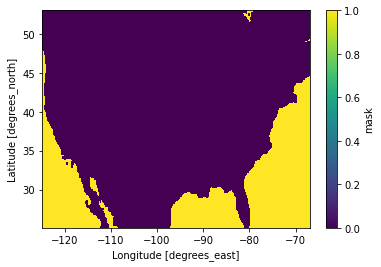

In [36]:
ds['mask'].plot()

## What do our arrays look like?



In [26]:
for name, da in ds.data_vars.items():
    print(name, da.data)

elevation dask.array<concatenate, shape=(100, 224, 464), dtype=float64, chunksize=(1, 224, 464), chunktype=numpy.ndarray>
pcp dask.array<concatenate, shape=(100, 366, 224, 464), dtype=float32, chunksize=(1, 366, 224, 464), chunktype=numpy.ndarray>
t_mean dask.array<concatenate, shape=(100, 366, 224, 464), dtype=float32, chunksize=(1, 366, 224, 464), chunktype=numpy.ndarray>
t_range dask.array<concatenate, shape=(100, 366, 224, 464), dtype=float32, chunksize=(1, 366, 224, 464), chunktype=numpy.ndarray>


## Let's calculate some things



In [27]:
da_mean = ds['t_mean'].mean(dim='time')
da_mean

<xarray.DataArray 't_mean' (ensemble: 100, lat: 224, lon: 464)>
dask.array<mean_agg-aggregate, shape=(100, 224, 464), dtype=float32, chunksize=(1, 224, 464), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 25.12 25.25 25.38 25.5 ... 52.62 52.75 52.88 53.0
  * lon      (lon) float64 -124.9 -124.8 -124.6 -124.5 ... -67.25 -67.12 -67.0
Dimensions without coordinates: ensemble

In [28]:
da_spread = da_mean.max(dim='ensemble') - da_mean.min(dim='ensemble')
da_spread

<xarray.DataArray 't_mean' (lat: 224, lon: 464)>
dask.array<sub, shape=(224, 464), dtype=float32, chunksize=(224, 464), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 25.12 25.25 25.38 25.5 ... 52.62 52.75 52.88 53.0
  * lon      (lon) float64 -124.9 -124.8 -124.6 -124.5 ... -67.25 -67.12 -67.0

## What's happening?



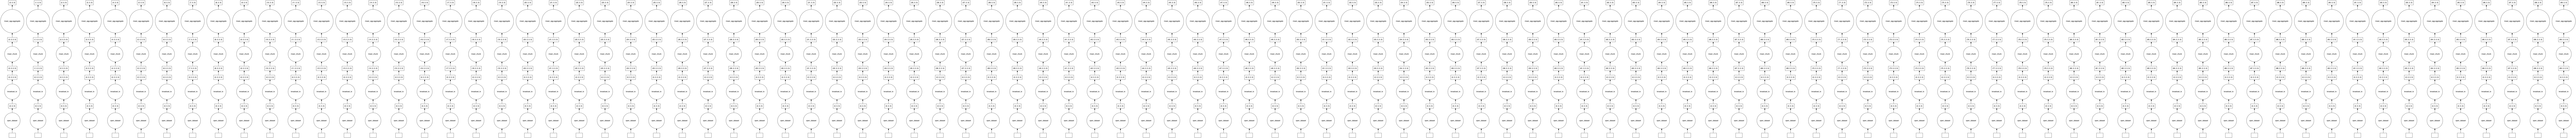

In [29]:
from dask import visualize
visualize(da_mean)

## Actually computing results



In [30]:
out = da_spread.load()

/opt/homebrew/Caskroom/miniforge/base/envs/ce597/lib/python3.10/site-packages/dask/array/reductions.py:608: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/opt/homebrew/Caskroom/miniforge/base/envs/ce597/lib/python3.10/site-packages/dask/array/reductions.py:579: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


## Or plotting results



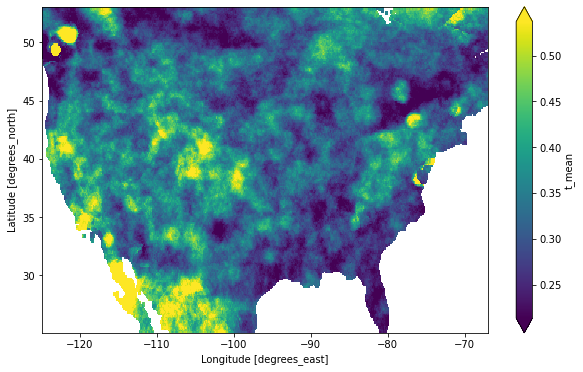

In [31]:
da_spread.plot(robust=True, figsize=(10, 6))